# Hierarchial Clustering - Dendrogram



### Dataset Description

The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. It contains 8 columns with 400 instances.

### Hierarchical Clustering
Hierarchical Clustering is an unsupervised learning algorithm which is used to group similar data-points in a cluster. It creates clusters that have a pre-determined order from top to bottom. For example, files and folders organized in a hierarchy on a hard-disk.There are two types of Hierarchial Clustering:
#### Agglomerative Hierarchial Clustering:
It is most commonly used. It works in a **bottom-up manner**. Here, we assign each data-point to a individual cluster and then calculate the similarity between each of the clusters using either **Eulidean Distance** or **Manhattan Distance** and club the most similar clusters. It merges similar points of cluster and stops when all the data-points are merged into a single cluster.
#### Divisive Hierarchial Clustering:
It is not used much. It is the inverse of Agglomerative Hierarchial Clustering. It works in a top-down manner. Here, we assign all the data-points to a single cluster after each iteration we remove the data-points from the cluster which are not similar and each data-point that we remove is treated as an individual cluster. Here, we are dividing the cluster in every step. This is why, it is known as Divisive Hierarchial Clustering. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
#df = pd.read_csv('Wholesale customers data.csv')
print(df.shape)
df.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
#Standardizing or Normalizing our dataset to bring all the features in the same scale
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
type(scaled_df)

numpy.ndarray

In [ ]:
scaled_df[0:10, :]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689],
       [ 1.44865163,  0.59066829, -0.20480553,  0.33406659, -0.29763704,
        -0.49615501, -0.22813824, -0.02622403],
       [ 1.44865163,  0.59066829,  0.00995035, -0.35231565, -0.10284877,
        -0.53451222,  0.05428041, -0.34785425],
       [ 1.44865163,  0.59066829, -0.34998145, -0.11398095,  0.15535895,
        -0.28931479,  0.09228619,  0.36960125],
       [-0.69029709,  0.59066829

In [6]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


**Visualizing the Dendrogram**

For creating the dendrogram, we are going to use only the first 40 instances (rows) to understand the concept of dendrogram easily

Text(0, 0.5, 'Distance between Samples')

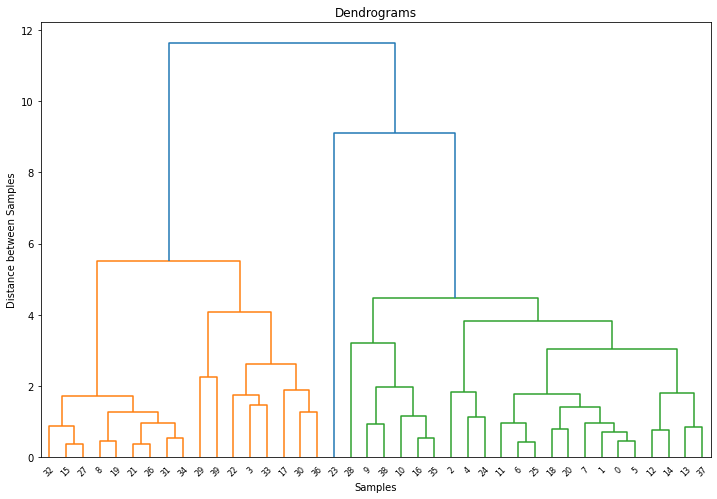

In [9]:
plt.figure(figsize=(12, 8))
plt.title("Dendrograms")  
# dendrogram = shc.dendrogram(shc.linkage(scaled_df, method='ward')) # using the 'ward' linkage
dendrogram = shc.dendrogram(shc.linkage(scaled_df.iloc[:40,:], method='ward')) # using the 'ward' linkage
plt.xlabel('Samples')
plt.ylabel('Distance between Samples')

**How to read the Dendrogram?**

To interpret a dendrogram one must focus on the height at which any two objects are joined together. From above, we can say that points 0 and 5 are most similar because the height of the link that joins them together is the smallest. The next two most similar objects are points 6 and 7. Then, a cluster is going to be formed between these two points first.

The height of the dendogram represents the Euclidean distance between points. It can be seen that Euclidean Distance between points 6&7 is greater than the distance between points 0 and 5.

Now, we are going to join the cluster formed by joining two points to the next nearest cluster or point which results into another cluster. From above, we can see that point 1 is closest to cluster of point 0 and 5. A dendrogram can be generated by joining point 1 with dendrogram of point 0 and 5. We continue this process until all the points are joined together to form one big cluster.






##### **How to decide the Number of Clusters?**



From above, you can see that blue line has the maximum distance. We can select a threshold of 10 and the cut the dendrogram.

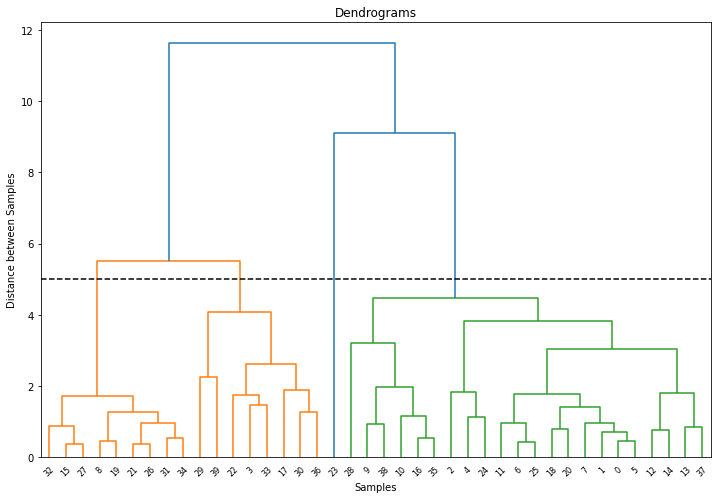

In [12]:
plt.figure(figsize=(12, 8))
plt.title("Dendrograms")  
dendrogram = shc.dendrogram(shc.linkage(scaled_df.iloc[:40,:], method='ward'))
#dendrogram = shc.dendrogram(shc.linkage(scaled_df, method='ward'))
#ward is used to calculate distance between newly formed clusters and can only be used with Euclidean Distance 
plt.axhline(y=5, color='k', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Distance between Samples')
plt.show()

**From above, you can see that the line cuts the dendrogram at two points. That means we are going to apply hierarchial clustering for two clusters**